In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_speedup(execution_times):
    """
    Calculate speedup based on execution times.
    Speedup = time with 1 resource / time with N resources
    """
    return execution_times[0] / execution_times

def calculate_efficiency(speedup, resources):
    """
    Calculate efficiency based on speedup and resources.
    Efficiency = speedup / number of resources
    """
    return speedup / resources

def plot_performance_metrics(resources, execution_times):
    """
    Plot execution times, speedup, efficiency, and ideal lines for execution time and efficiency.

    Parameters:
    - resources: array-like of number of resources (e.g., processors)
    - execution_times: array-like of execution times corresponding to resources
    """
    resources = np.array(resources)
    execution_times = np.array(execution_times)
    
    speedup = calculate_speedup(execution_times)
    efficiency = calculate_efficiency(speedup, resources)
    
    # Ideal execution time assuming perfect linear speedup from base
    ideal_execution_time = execution_times[0] / resources
    
    # Ideal efficiency is always 1 for perfect scaling
    ideal_efficiency = np.ones_like(resources)

    plt.figure(figsize=(18, 5))

    # Execution time plot
    plt.subplot(1, 3, 1)
    plt.plot(resources, execution_times, marker='o', label='Actual')
    plt.plot(resources, ideal_execution_time, 'r--', label='Ideal')
    plt.title('Execution Time')
    plt.xlabel('Number of Resources')
    plt.ylabel('Time (seconds)')
    plt.xticks(resources)  # X axis ticks only for given resources
    plt.grid(True)
    plt.legend()

    # Speedup plot
    plt.subplot(1, 3, 2)
    plt.plot(resources, speedup, marker='o', label='Actual Speedup')
    plt.plot(resources, resources, 'k--', label='Ideal Speedup')
    plt.title('Speedup')
    plt.xlabel('Number of Resources')
    plt.ylabel('Speedup')
    plt.xticks(resources)
    plt.legend()
    plt.grid(True)

    # Efficiency plot
    plt.subplot(1, 3, 3)
    plt.plot(resources, efficiency, marker='o', label='Actual Efficiency')
    plt.plot(resources, ideal_efficiency, 'g--', label='Ideal Efficiency')
    plt.title('Efficiency')
    plt.xlabel('Number of Resources')
    plt.ylabel('Efficiency')
    plt.ylim(0, 1.1)
    plt.xticks(resources)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
# resources_example = [1, 2, 4, 8, 16]
# exec_times_example = [100, 55, 30, 17, 10]
# plot_performance_metrics(resources_example, exec_times_example)


In [17]:
def calculate_weak_scaling_efficiency(execution_times):
    """
    Calculate weak scaling efficiency based on execution times.
    Efficiency = time with 1 resource / time with N resources
    """
    return execution_times[0] / execution_times


def plot_weak_scaling_metrics(resources, execution_times):
    """
    Plot execution time and weak scaling efficiency for weak scaling data,
    with y-axis limits set.

    Parameters:
    - resources: array-like of number of resources (e.g., processors)
    - execution_times: array-like of execution times corresponding to resources
    """
    resources = np.array(resources)
    execution_times = np.array(execution_times)
    
    efficiency = calculate_weak_scaling_efficiency(execution_times)
    
    ideal_execution_time = np.full_like(resources, execution_times[0], dtype=float)
    ideal_efficiency = np.ones_like(resources)
    
    plt.figure(figsize=(12, 5))
    
    # Execution time plot (ideally constant)
    plt.subplot(1, 2, 1)
    plt.plot(resources, execution_times, marker='o', label='Actual')
    plt.plot(resources, ideal_execution_time, 'r--', label='Ideal')
    plt.title('Weak Scaling: Execution Time')
    plt.xlabel('Number of Resources')
    plt.ylabel('Time (seconds)')
    plt.xticks(resources)
    plt.ylim(0, max(execution_times)*1.2)  # y axis limit to 20% above max execution time
    plt.grid(True)
    plt.legend()
    
    # Efficiency plot
    plt.subplot(1, 2, 2)
    plt.plot(resources, efficiency, marker='o', label='Actual Efficiency')
    plt.plot(resources, ideal_efficiency, 'g--', label='Ideal Efficiency')
    plt.title('Weak Scaling: Efficiency')
    plt.xlabel('Number of Resources')
    plt.ylabel('Efficiency')
    plt.ylim(0, 1.1)  # Efficiency limited to 1.1 max
    plt.xticks(resources)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# Example usage for weak scaling data:
# resources_weak = [1, 2, 4, 8, 16]
# exec_times_weak = [100, 105, 110, 115, 120]  # Ideally constant or slightly increasing
# plot_weak_scaling_metrics(resources_weak, exec_times_weak)


In [33]:
def plot_stacked_times(nodes, comp_times, comm_times, total_times, scaling_type="Scaling"):
    """
    Plot stacked bar chart of computation + communication + overhead times.
    Shows both absolute times and normalized proportions side by side.
    Uses a colorblind-friendly palette.
    Ensures categorical x-axis (even spacing for nodes like 1,2,4,8,16).
    """
    # Convert nodes into strings for categorical axis
    nodes_str = [str(n) for n in nodes]

    # Compute overhead
    overhead_times = [t - (c + cm) for t, c, cm in zip(total_times, comp_times, comm_times)]

    # Normalize values
    comp_norm = [c/t if t > 0 else 0 for c, t in zip(comp_times, total_times)]
    comm_norm = [cm/t if t > 0 else 0 for cm, t in zip(comm_times, total_times)]
    overhead_norm = [o/t if t > 0 else 0 for o, t in zip(overhead_times, total_times)]

    # Colorblind-friendly colors (Okabe-Ito)
    colors = {
        "Computation": "#0072B2",   # blue
        "Communication": "#E69F00", # orange
        "Overhead": "#009E73"       # green
    }

    fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=False)

    # --- Absolute times ---
    axes[0].bar(nodes_str, comp_times, label="Computation", color=colors["Computation"])
    axes[0].bar(nodes_str, comm_times, bottom=comp_times, label="Communication", color=colors["Communication"])
    axes[0].bar(nodes_str, overhead_times,
                bottom=[c+cm for c, cm in zip(comp_times, comm_times)], 
                label="Overhead", color=colors["Overhead"])
    axes[0].plot(nodes_str, total_times, marker="o", color="black", label="Total Time", linewidth=1.2)

    axes[0].set_xlabel("Number of Nodes")
    axes[0].set_ylabel("Time (s)")
    axes[0].set_title(f"Absolute Times - {scaling_type.capitalize()} Scaling")
    axes[0].legend()
    axes[0].grid(axis="y", alpha=0.3)

    # --- Normalized times ---
    axes[1].bar(nodes_str, comp_norm, label="Computation", color=colors["Computation"])
    axes[1].bar(nodes_str, comm_norm, bottom=comp_norm, label="Communication", color=colors["Communication"])
    axes[1].bar(nodes_str, overhead_norm,
                bottom=[c+cm for c, cm in zip(comp_norm, comm_norm)], 
                label="Overhead", color=colors["Overhead"])

    axes[1].set_xlabel("Number of Nodes")
    axes[1].set_ylabel("Proportion of Total Time")
    axes[1].set_title(f"Normalized Times - {scaling_type.capitalize()} Scaling")
    axes[1].legend()
    axes[1].grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

---

# Orfeo

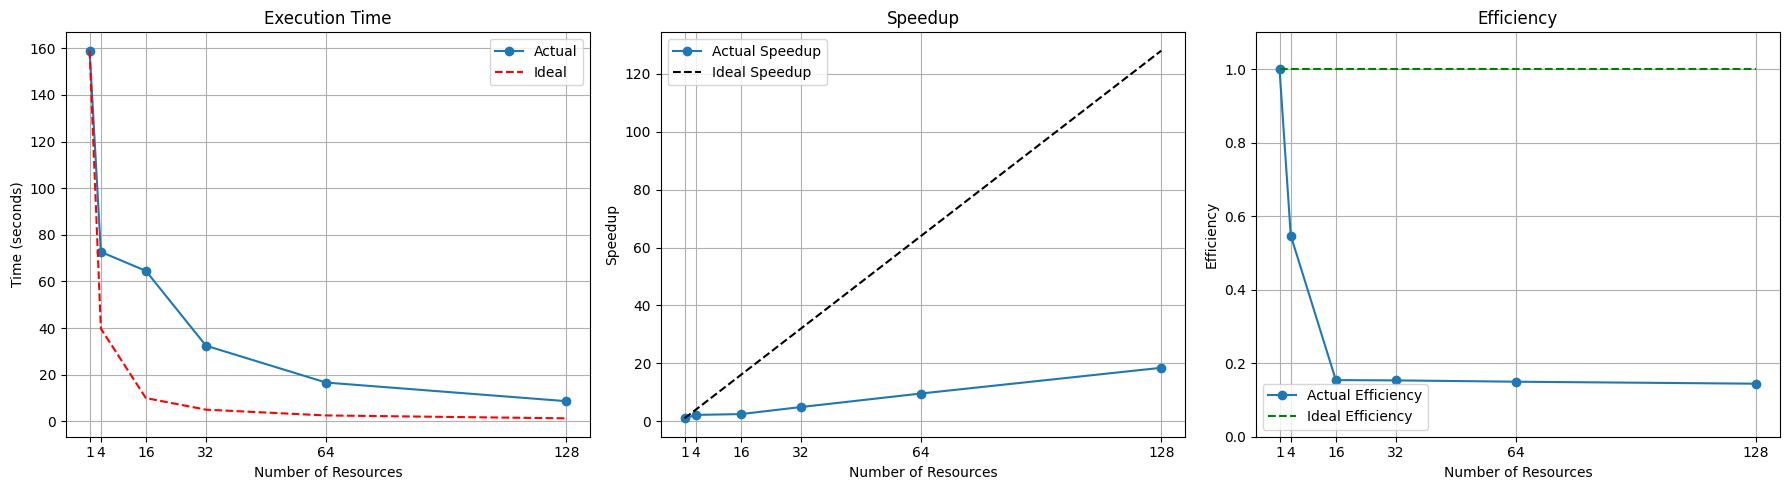

In [4]:
omp_scaling_res = [1, 4, 16, 32, 64, 128]
omp_scaling_times = [158.964383,
                     72.641469,
                     64.502863,
                     32.419459,
                     16.596260,
                     8.610296]
plot_performance_metrics(omp_scaling_res, omp_scaling_times)

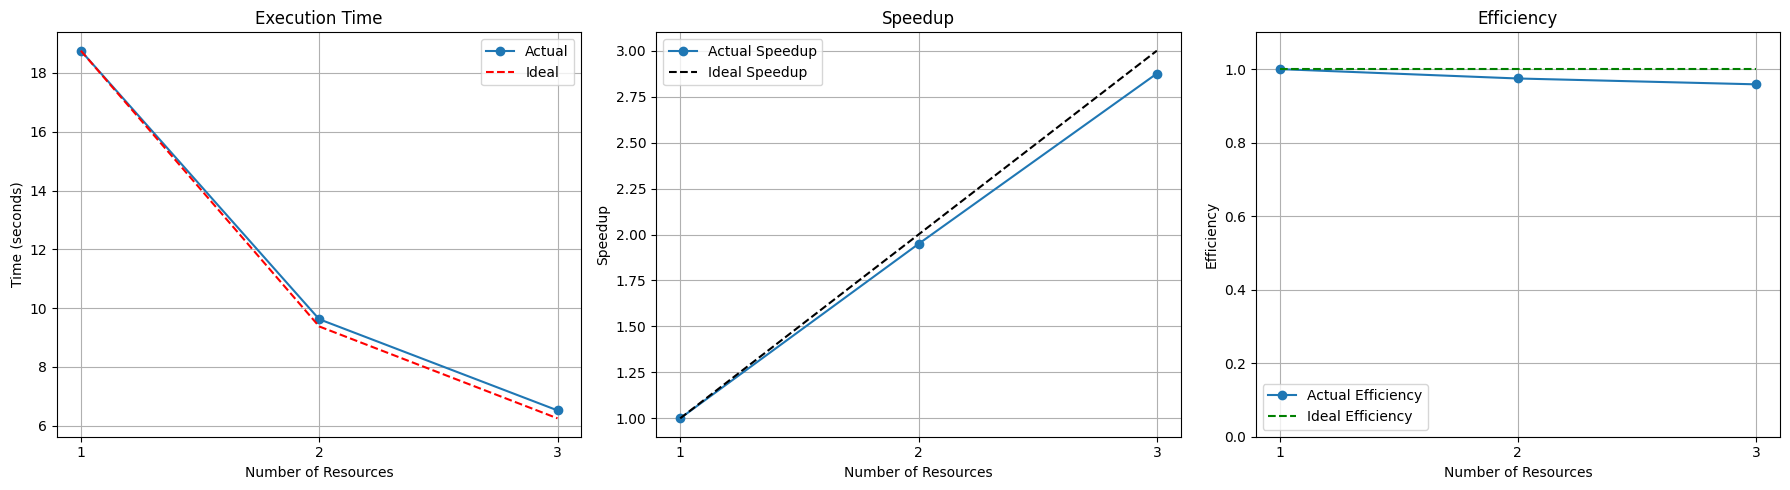

In [13]:
strong_scaling_res = [1, 2, 3]
strong_scaling_times = [18.757865,
                        9.624827,
                        6.523075]
plot_performance_metrics(strong_scaling_res, strong_scaling_times)

---

# Leonardo

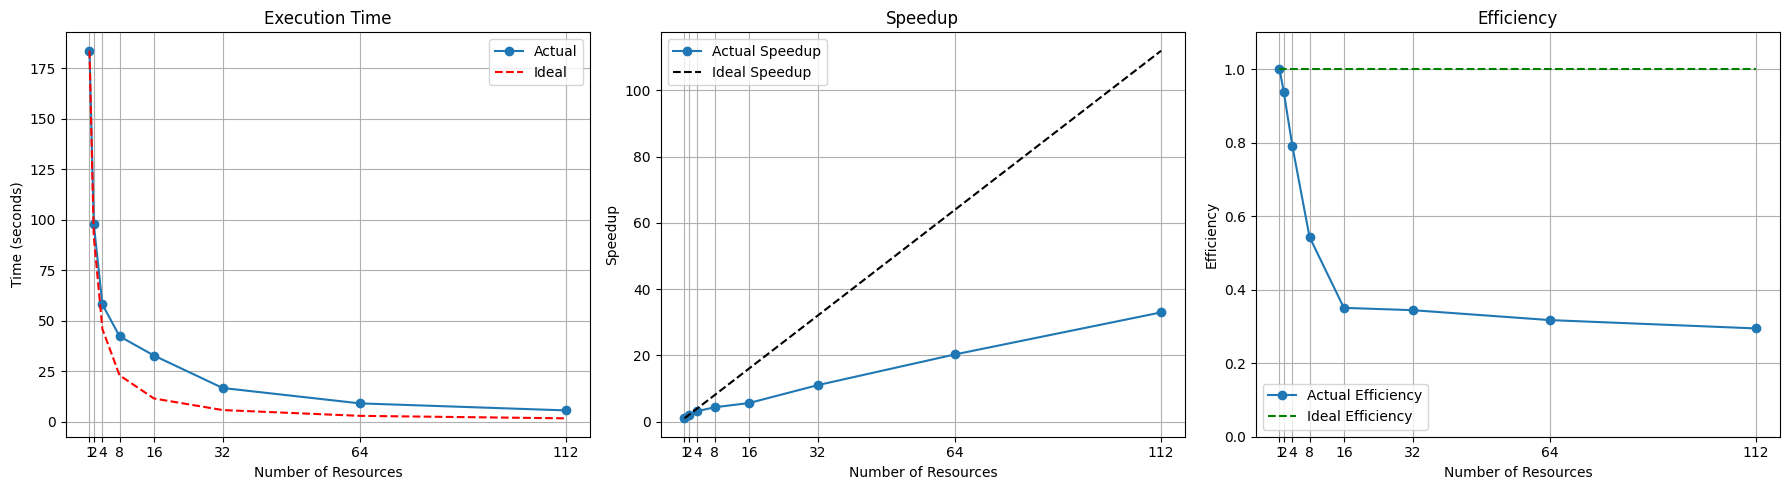

In [ ]:
omp_scaling_res_leo = [1, 2, 4, 8, 16, 32, 64, 112]
omp_scaling_times_leo = [183.700995,
                     97.945487,
                     58.092922,
                     42.269610,
                     32.751466,
                     16.676214,
                     9.047704,
                     5.568040]
plot_performance_metrics(omp_scaling_res_leo, omp_scaling_times_leo)

## Strong scaling

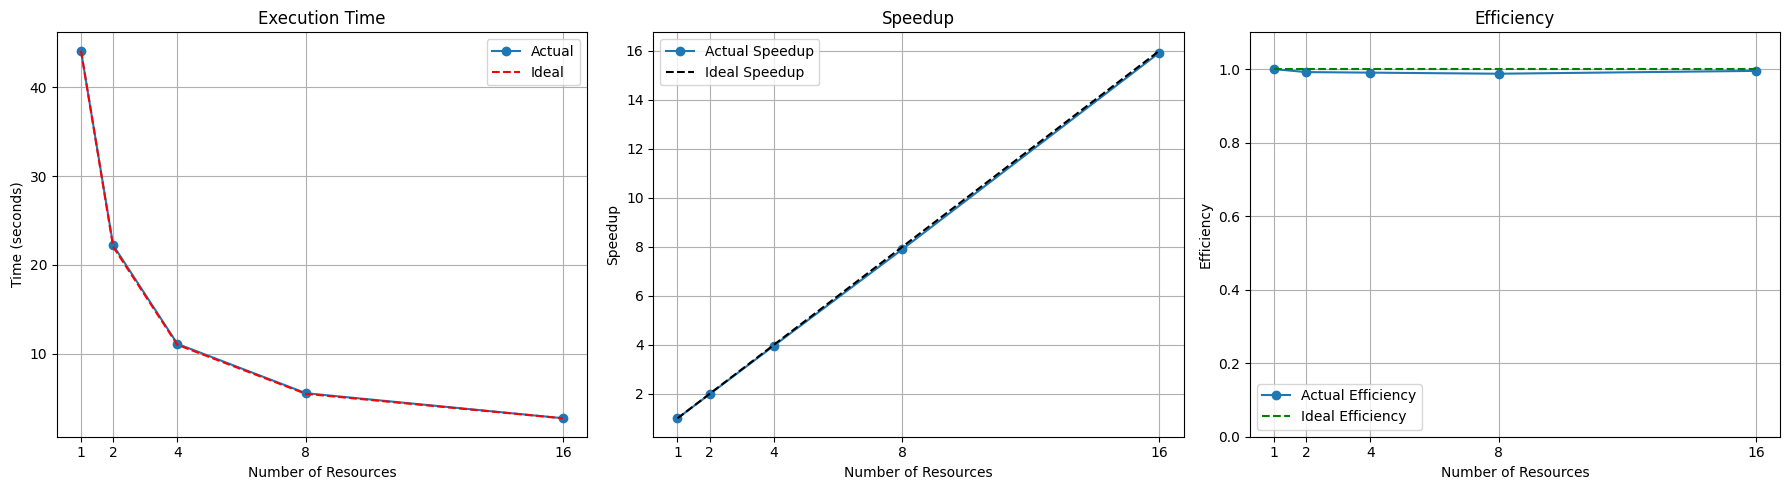

In [ ]:
#These are computation times
strong_scaling_res_leo = [1, 2, 4, 8, 16]
strong_scaling_times_leo = [44.094687,
                     22.228510,
                     11.130723,
                     5.582201,
                     2.769336]
plot_performance_metrics(strong_scaling_res_leo, strong_scaling_times_leo)

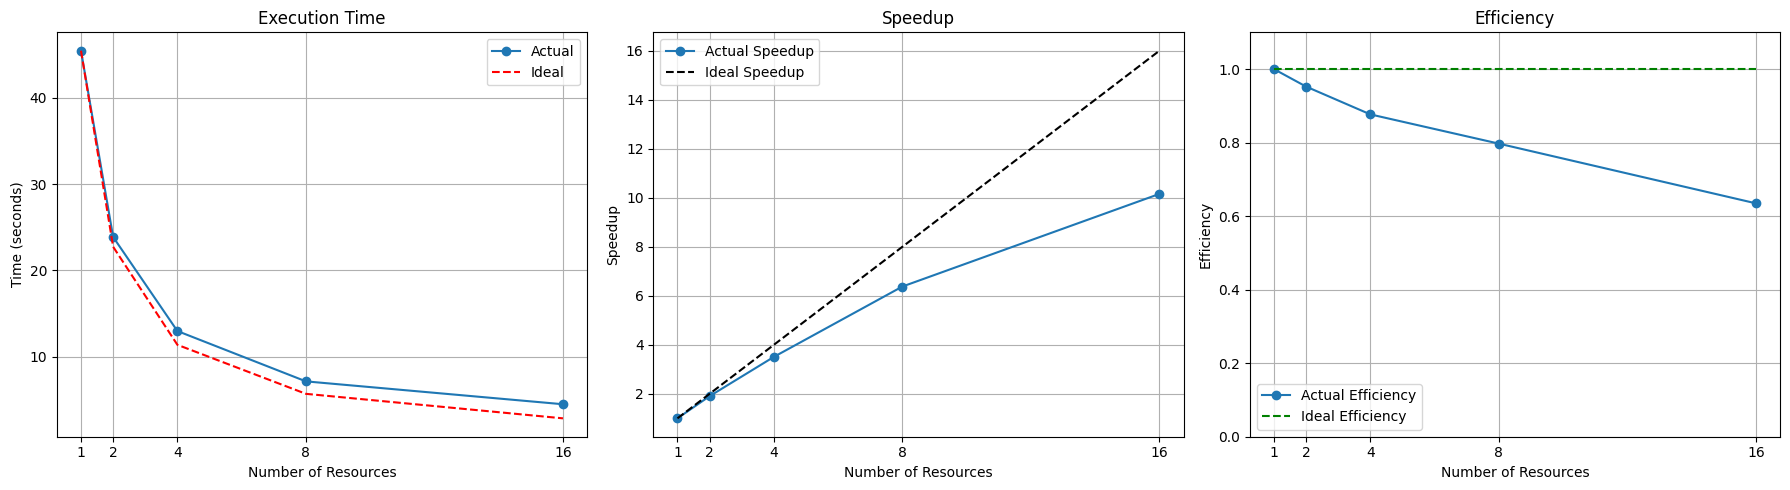

In [12]:
#These are total times
strong_scaling_res_leo_tot = [1, 2, 4, 8, 16]
strong_scaling_times_leo_tot = [45.464965939,
                     23.866722567,
                     12.962934568,
                     7.128414741,
                     4.475878375]
plot_performance_metrics(strong_scaling_res_leo_tot, strong_scaling_times_leo_tot)

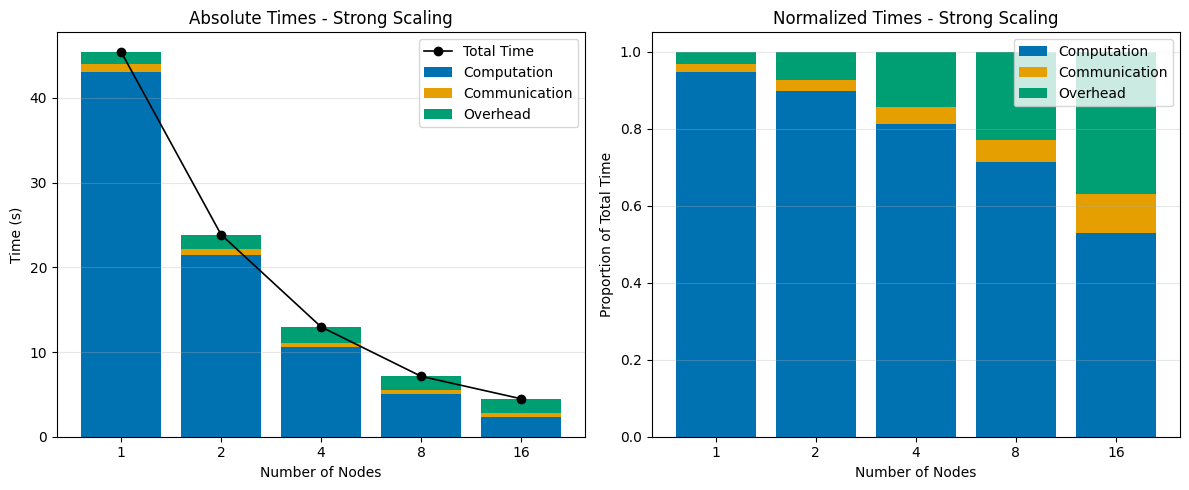

In [38]:
# Times
nodes = [1, 2, 4, 8, 16]
comp_times = [44.023214, 22.125730, 11.096290, 5.490233, 2.821940]
comm_times = [0.930509, 0.703526, 0.557649, 0.396814, 0.452814] # last could be 0.391281
comp_times = [c - m for c, m in zip(comp_times, comm_times)]
total_times = [45.464965939, 23.866722567, 12.962934568, 7.128414741, 4.475878375]  # note: not equal to comp+comm

plot_stacked_times(nodes, comp_times, comm_times, total_times, scaling_type="Strong")

## Weak scaling

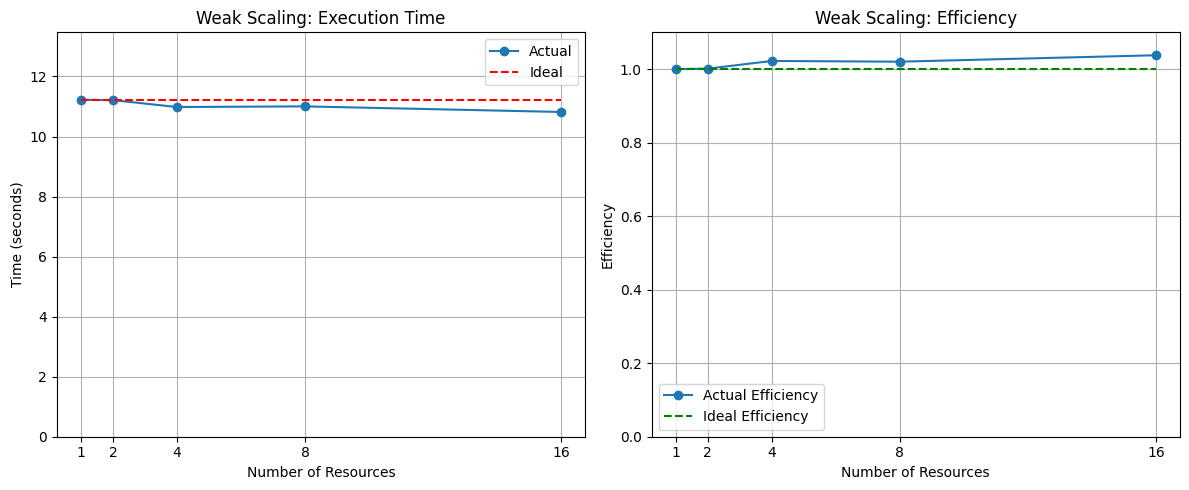

In [18]:
#These are total times
weak_scaling_res_leo_comp = [1, 2, 4, 8, 16]
weak_scaling_times_leo_comp = [11.225135,
                               11.211481,
                               10.982193,
                               11.003348,
                               10.817501]
plot_weak_scaling_metrics(weak_scaling_res_leo_comp, weak_scaling_times_leo_comp)

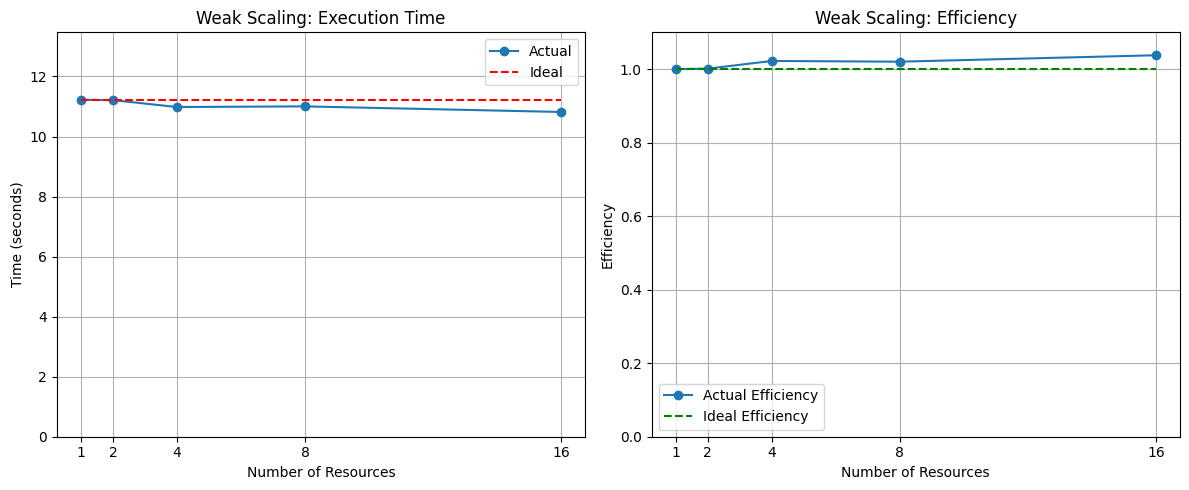

In [19]:
#These are total times
weak_scaling_res_leo_tot = [1, 2, 4, 8, 16]
weak_scaling_times_leo_tot = [12.692636562,
                              13.108712088,
                              13.004570821,
                              12.710186446,
                              12.751888898]
plot_weak_scaling_metrics(weak_scaling_res_leo_comp, weak_scaling_times_leo_comp)

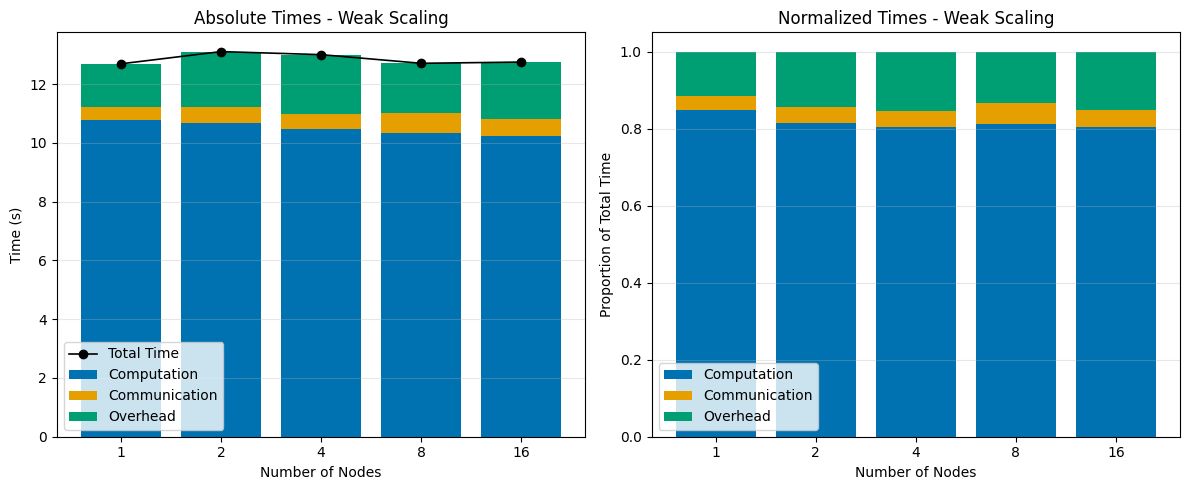

In [39]:
# Times
nodes = [1, 2, 4, 8, 16]
comp_times = [11.225135, 11.211481, 10.982193, 11.003348, 10.817501]
comm_times = [0.457610, 0.524288, 0.521742, 0.668777, 0.568602]
comp_times = [c - m for c, m in zip(comp_times, comm_times)]
total_times = [12.692636562, 13.108712088, 13.004570821, 12.710186446, 12.751888898]  # note: not equal to comp+comm

plot_stacked_times(nodes, comp_times, comm_times, total_times, scaling_type="Weak")